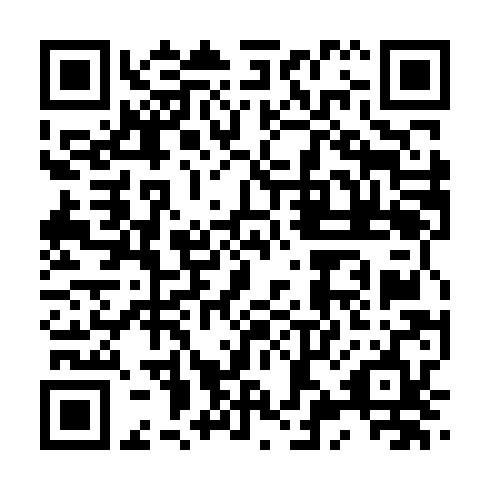

Kaggle(https://www.kaggle.com/) — система организации конкурсов по исследованию данных, а также социальная сеть специалистов по обработке данных и машинному обучению. Принадлежит корпорации Google (с марта 2017 года).
____
Чтоб получить доступ к наборам данных из colab блакнота, необходимо сгенерировать токен. Это можно сделать в настройках аккаунта.

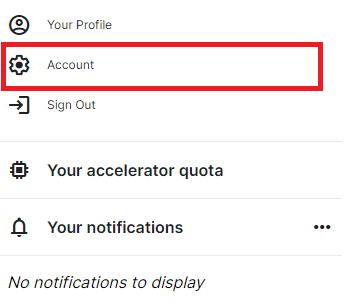
___
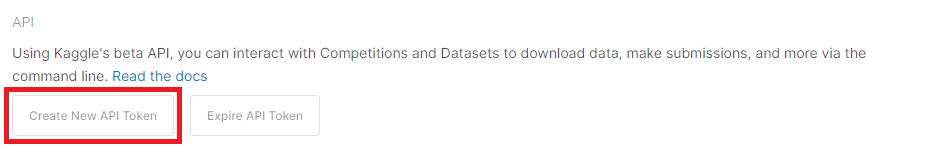

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alex365","key":"b6bebadad7b0fe0b52d0f1c0b1ef2ce0"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Oct 18 16:42 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

401 - Unauthorized


In [ ]:
!kaggle datasets download -d brynja/wineuci

401 - Unauthorized


In [ ]:
import pandas as pd
import zipfile
with zipfile.ZipFile("wineuci.zip","r") as z:
    z.extractall(".")

In [ ]:
import pandas as pd
df_wine = pd.read_csv('Wine.csv')
df_wine.head(10)



Ссылка на набор данных
https://drive.google.com/file/d/1iZLnKD58_cz1gmQPwWbr6I_qNU_ujXlg/view?usp=sharing

In [ ]:
import pandas as pd
global df
df = pd.read_csv('/content/drive/MyDrive/Sciencevsu/3. Алгоритмы в нейронных сетях/3. data analysis/DataPreprocessing.csv')
df.head(10)

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [ ]:
df.isnull().sum()

df1 =  df.copy()
# можно просто отбросить столбцы с пропущенными значениями значение axis  удаляет строки - 0  или столбцы 1
df1.dropna(axis=0)
#df1.dropna(how='all')
#df1.dropna(subset=['Age'])


,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
5,India,40.0,69600.0,Yes
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [ ]:
# удаление образцов иногда неприемлемо, в этом случае можно востановить значения на основе среднего
import numpy as np
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values = np.nan, strategy = 'mean', fill_value=None)
imr.fit(df.values[:,1:3])
df.loc[:,1:3]=imr.transform(df.values[:,1:3])
#imp = imr.fit_transform(df['Age'].values.reshape(-1,1))
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Region,Age,Income,Online Shopper
0,India,49.000000,86400.000000,No
1,Brazil,32.000000,57600.000000,Yes
2,USA,35.000000,64800.000000,No
3,Brazil,43.000000,73200.000000,No
4,USA,45.000000,76533.333333,Yes
5,India,40.000000,69600.000000,Yes
6,Brazil,43.777778,62400.000000,No
7,India,53.000000,94800.000000,Yes
8,USA,55.000000,99600.000000,No
9,India,42.000000,80400.000000,Yes


In [ ]:
# для корректной интерпритации порядковых признаков алгоритмами обучения, нам нужно преобразовать строковые значения в числа
size_mapping ={'India':1,'Brazil':2,'USA':3}
df['Region'] = df['Region'].map(size_mapping)
df

,Region,Age,Income,Online Shopper
0,1,49.000000,86400.000000,No
1,2,32.000000,57600.000000,Yes
2,3,35.000000,64800.000000,No
3,2,43.000000,73200.000000,No
4,3,45.000000,76533.333333,Yes
5,1,40.000000,69600.000000,Yes
6,2,43.777778,62400.000000,No
7,1,53.000000,94800.000000,Yes
8,3,55.000000,99600.000000,No
9,1,42.000000,80400.000000,Yes


In [ ]:
class_mapping = {label: idx for idx,label in enumerate(np.unique(df['Online Shopper']))}
df['Online Shopper'] = df['Online Shopper'].map(class_mapping)
df

,Region,Age,Income,Online Shopper
0,1,49.000000,86400.000000,0
1,2,32.000000,57600.000000,1
2,3,35.000000,64800.000000,0
3,2,43.000000,73200.000000,0
4,3,45.000000,76533.333333,1
5,1,40.000000,69600.000000,1
6,2,43.777778,62400.000000,0
7,1,53.000000,94800.000000,1
8,3,55.000000,99600.000000,0
9,1,42.000000,80400.000000,1


In [ ]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
df_wine.columns = ['метка класса','алкоголь','яблочная кислота','зола',
                   'щелочность золы','магний','фенолы','флавоноиды','нефлавоноидные фенолы',
                   'проантоцианины','интенсивность цвета','оттенок','OD280/OD315 разбавленных вин','пролин']
df_wine.head(10)

,метка класса,алкоголь,яблочная кислота,зола,щелочность золы,магний,фенолы,флавоноиды,нефлавоноидные фенолы,проантоцианины,интенсивность цвета,оттенок,OD280/OD315 разбавленных вин,пролин
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510


In [ ]:
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,
                                                 random_state = 0,
                                                 stratify = y)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
X_test_norm[:2,:]

array([[0.68128655, 0.18379447, 0.35947712, 0.26666667, 0.59259259,
        0.55862069, 0.54008439, 0.16      , 0.37974684, 0.36500888,
        0.46808511, 0.79752066, 0.55777461],
       [0.25730994, 0.13241107, 0.18300654, 0.24242424, 0.18518519,
        0.54137931, 0.4556962 , 0.32      , 0.42721519, 0.10301954,
        0.79787234, 0.60743802, 0.10699001]])

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std =  stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_test_std[:2,:]

array([[ 0.8973864 , -0.59158007, -0.47223021, -1.00522553,  1.54166796,
         0.49311436,  0.87416466, -1.27851833,  0.03739911,  0.30839921,
        -0.10934564,  0.84837261,  0.94286354],
       [-0.89266912, -0.8110549 , -1.50603149, -1.13071931, -0.99383863,
         0.41167899,  0.47740358, -0.62225227,  0.30076306, -0.93441122,
         1.31364044,  0.18234067, -0.99552745]])